In [1]:
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline


In [2]:
CONSUMER_KEY    = ''
CONSUMER_SECRET = ''
ACCESS_TOKEN  = ''
ACCESS_SECRET = ''

In [3]:
def t_setup():
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
    return tweepy.API(auth)

In [4]:
tweet_s=t_setup()
def get_tweets(username,count):
    tweets = tweet_s.user_timeline(screen_name=username, count=count)
    return tweets

In [5]:
print('Lets us see what US Prez tweeted recently\n')
tweets=get_tweets("realDonaldTrump",100)
print(tweets[0].text)
print('time of tweet\n')
print(tweets[0].created_at)

Lets us see what US Prez tweeted recently

States and Cities throughout our Country are being cheated and treated so badly by online retailers. Very unfair to… https://t.co/CSLMfhPLLq
time of tweet

2018-04-17 22:59:20


In [6]:
data=pd.DataFrame()
data['tweets']=[tweet.text for tweet in tweets]
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])
#dataframe for further use
data.head(10)


,tweets,len,ID,Date,Source,Likes,RTs
0,States and Cities throughout our Country are b...,140,986378606606737408,2018-04-17 22:59:20,Twitter for iPhone,15395,3688
1,RT @IvankaTrump: Great to be with Secretary Mn...,144,986362521417371648,2018-04-17 21:55:25,Twitter for iPhone,0,2113
2,RT @FoxBusiness: WATCH LIVE: @IvankaTrump and ...,140,986362433479610370,2018-04-17 21:55:04,Twitter for iPhone,0,1739
3,....Congress – House and Senate must quickly p...,140,986357230219022342,2018-04-17 21:34:23,Twitter for iPhone,17614,4643
4,Today’s Court decision means that Congress mus...,140,986357228306354178,2018-04-17 21:34:23,Twitter for iPhone,20266,5670
5,Welcome Prime Minister Abe! https://t.co/538EY...,51,986344953134673922,2018-04-17 20:45:36,Twitter for iPhone,27418,6854
6,Rasmussen just came out at 51% Approval despit...,140,986303188587425794,2018-04-17 17:59:39,Twitter for iPhone,50201,12501
7,Getting ready to meet Prime Minister Abe of Ja...,74,986301228337508354,2018-04-17 17:51:52,Twitter for iPhone,46446,7567
8,RT @NFIB: Our Optimism Index reached its 16th ...,140,986294947841232896,2018-04-17 17:26:54,Twitter for iPhone,0,3015
9,"RT @VP: Thanks to the historic TRUMP TAX CUTS,...",144,986294728810487808,2018-04-17 17:26:02,Twitter for iPhone,0,6775


## Is Prez Trump a bit talkative ?


In [7]:
mean = np.mean(data['len'])
tweets_hillary=get_tweets('HillaryClinton',100)
len_tweets_hillary=np.array([len(tweet.text) for tweet in tweets_hillary])
mean_h=np.mean(len_tweets_hillary)

if(mean> mean_h):
    print('Nothing to be suprised !!!!\n')
    print('Average length of Trumps Tweet')
    print(mean)
    
else:
    print('OMG What!!!!')

Nothing to be suprised !!!!

Average length of Trumps Tweet
126.96


In [8]:
fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])
fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

In [9]:
print('favourite_tweet by Prez Trump----->')
print(data['tweets'][fav])
print('\nMost retweeted_tweet of Prez Trump----->')
print(data['tweets'][rt])

favourite_tweet by Prez Trump----->
A perfectly executed strike last night. Thank you to France and the United Kingdom for their wisdom and the power o… https://t.co/oIPJVo3zQn

Most retweeted_tweet of Prez Trump----->
Russia vows to shoot down any and all missiles fired at Syria. Get ready Russia,  because they will be coming, nice… https://t.co/tFXJAYDnOh


In [10]:
tlen = pd.Series(data['len'].values, index=data['Date'])
tfav = pd.Series(data['Likes'].values, index=data['Date'])
tret = pd.Series(data['RTs'].values, index=data['Date'])

print(type(tlen))
print(type(tfav))
print(type(tret))
print(tlen[:4])


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
Date
2018-04-17 22:59:20    140
2018-04-17 21:55:25    144
2018-04-17 21:55:04    140
2018-04-17 21:34:23    140
dtype: int64


## length of tweets vs time

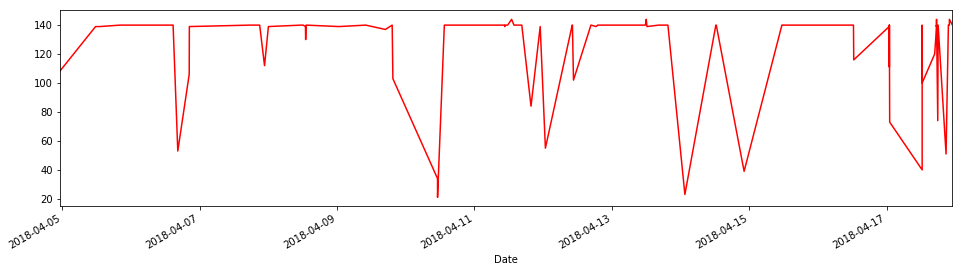

In [11]:
tlen.plot(figsize=(16,4), color='r')

## Likes over time

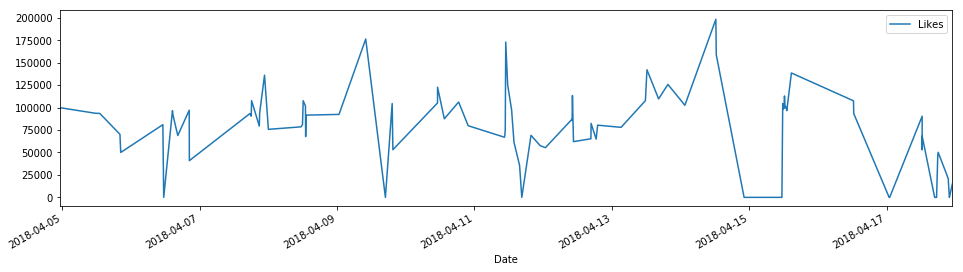

In [12]:
tfav.plot(figsize=(16,4), label="Likes", legend=True)

## RETWEETS  OVER TIME

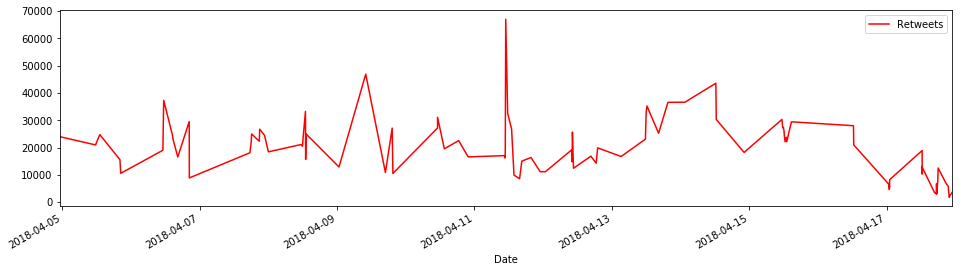

In [13]:
tret.plot(figsize=(16,4), label="Retweets", legend=True,color='r')

In [14]:
import textblob
import re

In [15]:
!python -m textblob.download_corpara

/home/aidris/anaconda3/bin/python: No module named textblob.download_corpara


In [16]:
from textblob import TextBlob

In [17]:
 def clean_tweet(tweet):
        '''
        clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
 

In [18]:
 def get_tweet_sentiment(tweet):
        '''
        to classify sentiment of passed tweet
        using textblob's sentiment method
        '''
        analysis = TextBlob(clean_tweet(tweet))
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'

In [19]:
get_tweet_sentiment(data['tweets'][0])

'negative'

In [20]:
data['sentiment nature']=[get_tweet_sentiment(tweet) for tweet in data['tweets']]

In [21]:
data[:10]

,tweets,len,ID,Date,Source,Likes,RTs,sentiment nature
0,States and Cities throughout our Country are b...,140,986378606606737408,2018-04-17 22:59:20,Twitter for iPhone,15395,3688,negative
1,RT @IvankaTrump: Great to be with Secretary Mn...,144,986362521417371648,2018-04-17 21:55:25,Twitter for iPhone,0,2113,positive
2,RT @FoxBusiness: WATCH LIVE: @IvankaTrump and ...,140,986362433479610370,2018-04-17 21:55:04,Twitter for iPhone,0,1739,positive
3,....Congress – House and Senate must quickly p...,140,986357230219022342,2018-04-17 21:34:23,Twitter for iPhone,17614,4643,negative
4,Today’s Court decision means that Congress mus...,140,986357228306354178,2018-04-17 21:34:23,Twitter for iPhone,20266,5670,negative
5,Welcome Prime Minister Abe! https://t.co/538EY...,51,986344953134673922,2018-04-17 20:45:36,Twitter for iPhone,27418,6854,positive
6,Rasmussen just came out at 51% Approval despit...,140,986303188587425794,2018-04-17 17:59:39,Twitter for iPhone,50201,12501,positive
7,Getting ready to meet Prime Minister Abe of Ja...,74,986301228337508354,2018-04-17 17:51:52,Twitter for iPhone,46446,7567,positive
8,RT @NFIB: Our Optimism Index reached its 16th ...,140,986294947841232896,2018-04-17 17:26:54,Twitter for iPhone,0,3015,positive
9,"RT @VP: Thanks to the historic TRUMP TAX CUTS,...",144,986294728810487808,2018-04-17 17:26:02,Twitter for iPhone,0,6775,negative


In [22]:
positive_tweets=data['tweets'][data['sentiment nature']=='positive']
neutral_tweets=data['tweets'][data['sentiment nature']=='neutral']
negative_tweets=data['tweets'][data['sentiment nature']=='negative']
len_pos=len(positive_tweets)
len_neg=len(negative_tweets)
len_neu=len(neutral_tweets)
print(len_pos,len_neg,len_neu)


52 29 19


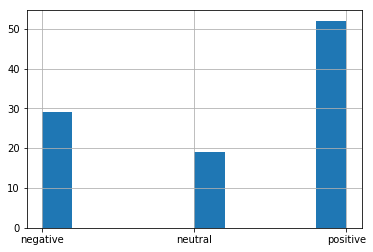

In [23]:
data['sentiment nature'].hist()


### using already processed tweets.txt

In [28]:
import sys
sys.path.append('./twitterSNA')


In [30]:
tweets=pd.read_table('./tweets.txt')
print(len(tweets['tweets']))

3410


In [31]:
from preprocesstweet import clean

In [32]:
tweets['tweets']=tweets['tweets'].apply(clean)

In [35]:
tweets['tweets'].to_csv('./cleanedtweets.csv')

In [36]:
"""
    Not used yet 
    to convert tweepy status object to string type
    """
def statustoSTR(tweet):
    
    import json
    return json.dumps(tweet._json)


In [37]:
"""
Not used yet
"""
word_counts={}
for tweet in tweets['tweets']:
    for word in tweet.split():
        if word not in word_counts:
            word_counts[word]=1
        else:
            word_counts[word]+=1
print("Size of vocabulary:{}".format(len(word_counts.items())))


Size of vocabulary:7595


In [38]:
"""
not used yet

embeddings_index={}
with open('twitterSNA/glove.twitter.27B/glove.twitter.27B.200d.txt',encoding='utf-8') as f:
    for line in f:
        values=line.split(' ')
        word=values[0]
        embedding=np.asarray(values[1:],dtype='float32')
        embeddings_index[word]=embedding
print('Word embeddings:',len(embeddings_index))
"""

"\nnot used yet\n\nembeddings_index={}\nwith open('twitterSNA/glove.twitter.27B/glove.twitter.27B.200d.txt',encoding='utf-8') as f:\n    for line in f:\n        values=line.split(' ')\n        word=values[0]\n        embedding=np.asarray(values[1:],dtype='float32')\n        embeddings_index[word]=embedding\nprint('Word embeddings:',len(embeddings_index))\n"

In [39]:
"""
not used yet

embedding_dim = 200 
clean_tweets=tweets['tweets']
embed_tweets = [] # Contains the 'average' embedding for each tweet
total_embeds = 0 
null_embeds = 0 

for tweet in clean_tweets:
    avg_embed = np.zeros(embedding_dim) 
    for word in tweet.split():
        total_embeds += 1
        embed = embeddings_index.get(word)
        if embed is not None:
            avg_embed += embed # Add embedding's values to vectors
        else:
            null_embeds += 1
    embed_tweets.append(avg_embed/len(tweet.split()))

print("Total Number of Embeddings:", total_embeds)
print("Number of Null Embeddings:", null_embeds)
print("% of Embeddings that are Null: {}%".format(round(null_embeds/total_embeds,4)*100))
"""

'\nnot used yet\n\nembedding_dim = 200 \nclean_tweets=tweets[\'tweets\']\nembed_tweets = [] # Contains the \'average\' embedding for each tweet\ntotal_embeds = 0 \nnull_embeds = 0 \n\nfor tweet in clean_tweets:\n    avg_embed = np.zeros(embedding_dim) \n    for word in tweet.split():\n        total_embeds += 1\n        embed = embeddings_index.get(word)\n        if embed is not None:\n            avg_embed += embed # Add embedding\'s values to vectors\n        else:\n            null_embeds += 1\n    embed_tweets.append(avg_embed/len(tweet.split()))\n\nprint("Total Number of Embeddings:", total_embeds)\nprint("Number of Null Embeddings:", null_embeds)\nprint("% of Embeddings that are Null: {}%".format(round(null_embeds/total_embeds,4)*100))\n'

## MARKOV CHAINS TWEET MODEL

In [48]:
from collections import defaultdict

def model(corpus):
    markov_dict = {'<start>':[]}
    starting_words = []
    for tweet in corpus.tweets:
        tok_tweet = tweet.split()
        word_count = len(tok_tweet)
        for index, word in enumerate(tok_tweet):
            if word not in markov_dict.keys():
                markov_dict[word] = []

            if index == word_count - 1:
                markov_dict[word].append("<end>")
                #couplet = (tok_tweet[index], "<EOT>")
            else:
                if index == 0:
                    starting_words.append(word)
                markov_dict[word].append(tok_tweet[index+1])
    return markov_dict, starting_words
markov_dict, starting_words = model(tweets)
print(list(markov_dict.items())[0:3])

[('<start>', []), ('rt', ['@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@', '@',

In [44]:
def write_tweet(starting_word, chain):
    """
    for any passed starting word
    will choose next word from 
    markov_dict alias chain here
    """
    tweet = starting_word
    current_word = starting_word
    
    while len(tweet) <= 140:        
        next_word = np.random.choice(chain[current_word])
        if next_word == '<end>':
            return tweet
        
        new_tweet = tweet + ' ' + next_word
        if  len(new_tweet) > 140:
            return tweet
        else:
            tweet = new_tweet
            current_word = next_word
f=open('./predicted_tweets.txt','w')
for x in range(0,100):
    starting_word = np.random.choice(starting_words)
    t=write_tweet(starting_word, markov_dict)
    print(str(t)+"\n")
    f.write(t)
    f.write('\n')
    

thank you to be years that it was close !

rt @ housegop and barriers on the @ gregabbotttx : 00 am pleased to ask for the worst and elsewhere enough !

cutting rates cite this morning for final stop drugs pour into our great timeline on @ deptofdefense happythanksgiving from @ bernieandsid

stock market is one in missouri that he was an executive order and were invited by the democrats for 10 years change and strong border

“some 40 is among the united nations security the democrats obstruction ?

✔nearly doubles the omnibus spending bill tonight so tragic situation in penn iowa @ foxandfriends now experts please wish the train the

things having many ways since election with zero access pipelines border patrol agents are working great and praising…

democrats who is # g20summit here again !

fired their healthcare and ready !

healthcare and have happened on house maralago very hard

tremendous abuse will be safe communities across the world leaders la…

thank you continued success a

### FINALLY WORD CLOUD OF TWEETS COLLECTED

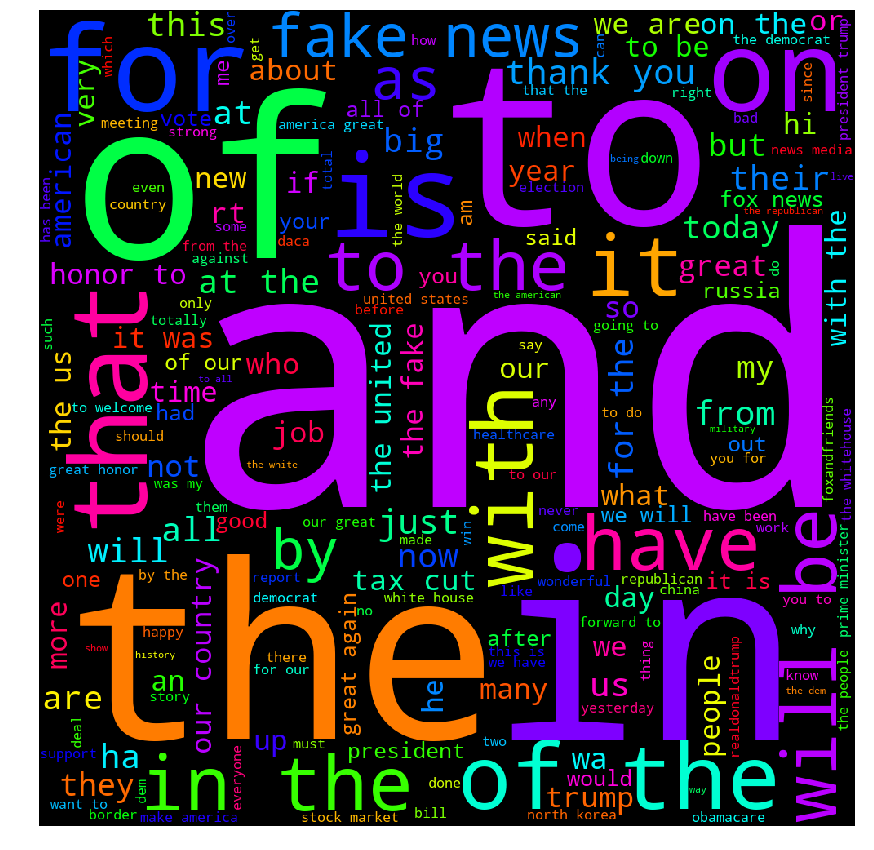

In [45]:
from wordcloud import WordCloud
wordcld = pd.Series(tweets['tweets'].tolist())
cloud = WordCloud(width=1000, height=1000,
                  stopwords=('https', 'http', 'com'), 
                  colormap='hsv').generate(''.join(wordcld.astype(str)))

plt.figure(figsize=(15, 15))
plt.imshow(cloud)
plt.axis('off')
plt.show()
